In [1]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
#Loading Dataset
df = pd.read_csv('car data.csv')
print("Column names :")
print(df.columns.tolist())
print()
print(df.head())

Column names :
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [5]:
# Exploratory Data Analysis

In [6]:
number_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numeric Columns : {number_cols}")
categorical_cols = df.select_dtypes(include=['object','category']).columns
print(f"Categorical Columns : {categorical_cols}")

Numeric Columns : Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')
Categorical Columns : Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


Correlation Matrix : {'Year': {'Year': 1.0, 'Selling_Price': 0.24, 'Present_Price': -0.05, 'Kms_Driven': -0.52, 'Owner': -0.18}, 'Selling_Price': {'Year': 0.24, 'Selling_Price': 1.0, 'Present_Price': 0.88, 'Kms_Driven': 0.03, 'Owner': -0.09}, 'Present_Price': {'Year': -0.05, 'Selling_Price': 0.88, 'Present_Price': 1.0, 'Kms_Driven': 0.2, 'Owner': 0.01}, 'Kms_Driven': {'Year': -0.52, 'Selling_Price': 0.03, 'Present_Price': 0.2, 'Kms_Driven': 1.0, 'Owner': 0.09}, 'Owner': {'Year': -0.18, 'Selling_Price': -0.09, 'Present_Price': 0.01, 'Kms_Driven': 0.09, 'Owner': 1.0}}


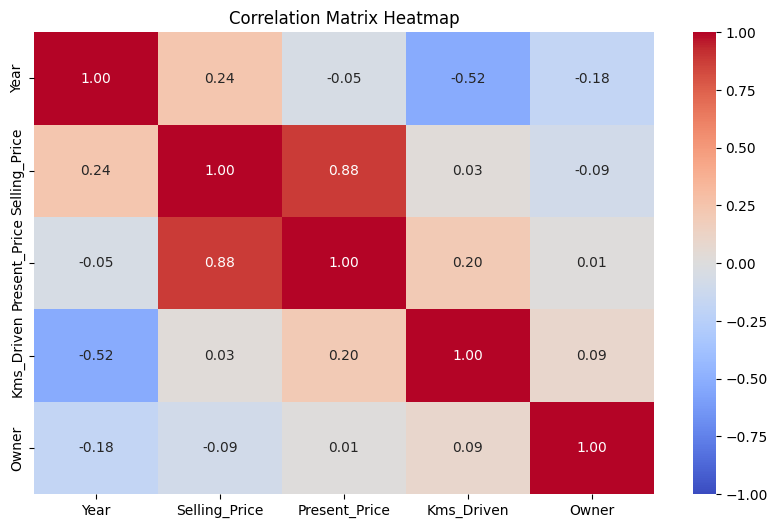

In [7]:
#Getting Correlation Matrix from Numerical Cols
num_cols = len(number_cols)
corr_matrix = {col : {col : 0 for col in number_cols} for col in number_cols}

for i in range(num_cols):
    for j in range(i, num_cols):
        col1 = number_cols[i]
        col2 = number_cols[j]

        mean1 = df[col1].mean()
        mean2 = df[col2].mean()

        covariance = ((df[col1] - mean1) * (df[col2] - mean2)).mean()

        std_dev1 = df[col1].std()
        std_dev2 = df[col2].std()

        correlation = round(covariance / (std_dev1 * std_dev2), 2)

        corr_matrix[col1][col2] = correlation
        corr_matrix[col2][col1] = correlation

print(f"Correlation Matrix : {corr_matrix}")

#Plotting Correlation Matrix Heatmap
corr_matrix2 = df.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix2, annot = True, fmt = '.2f', cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
# Selling price is highly dependent on present price and year and least impacted by kms_driven and owner. As for relations between feature pairs, kms_driven and year has fairly high correlation. Kms_driven and present price are also slightly correlated as well as owner and year.

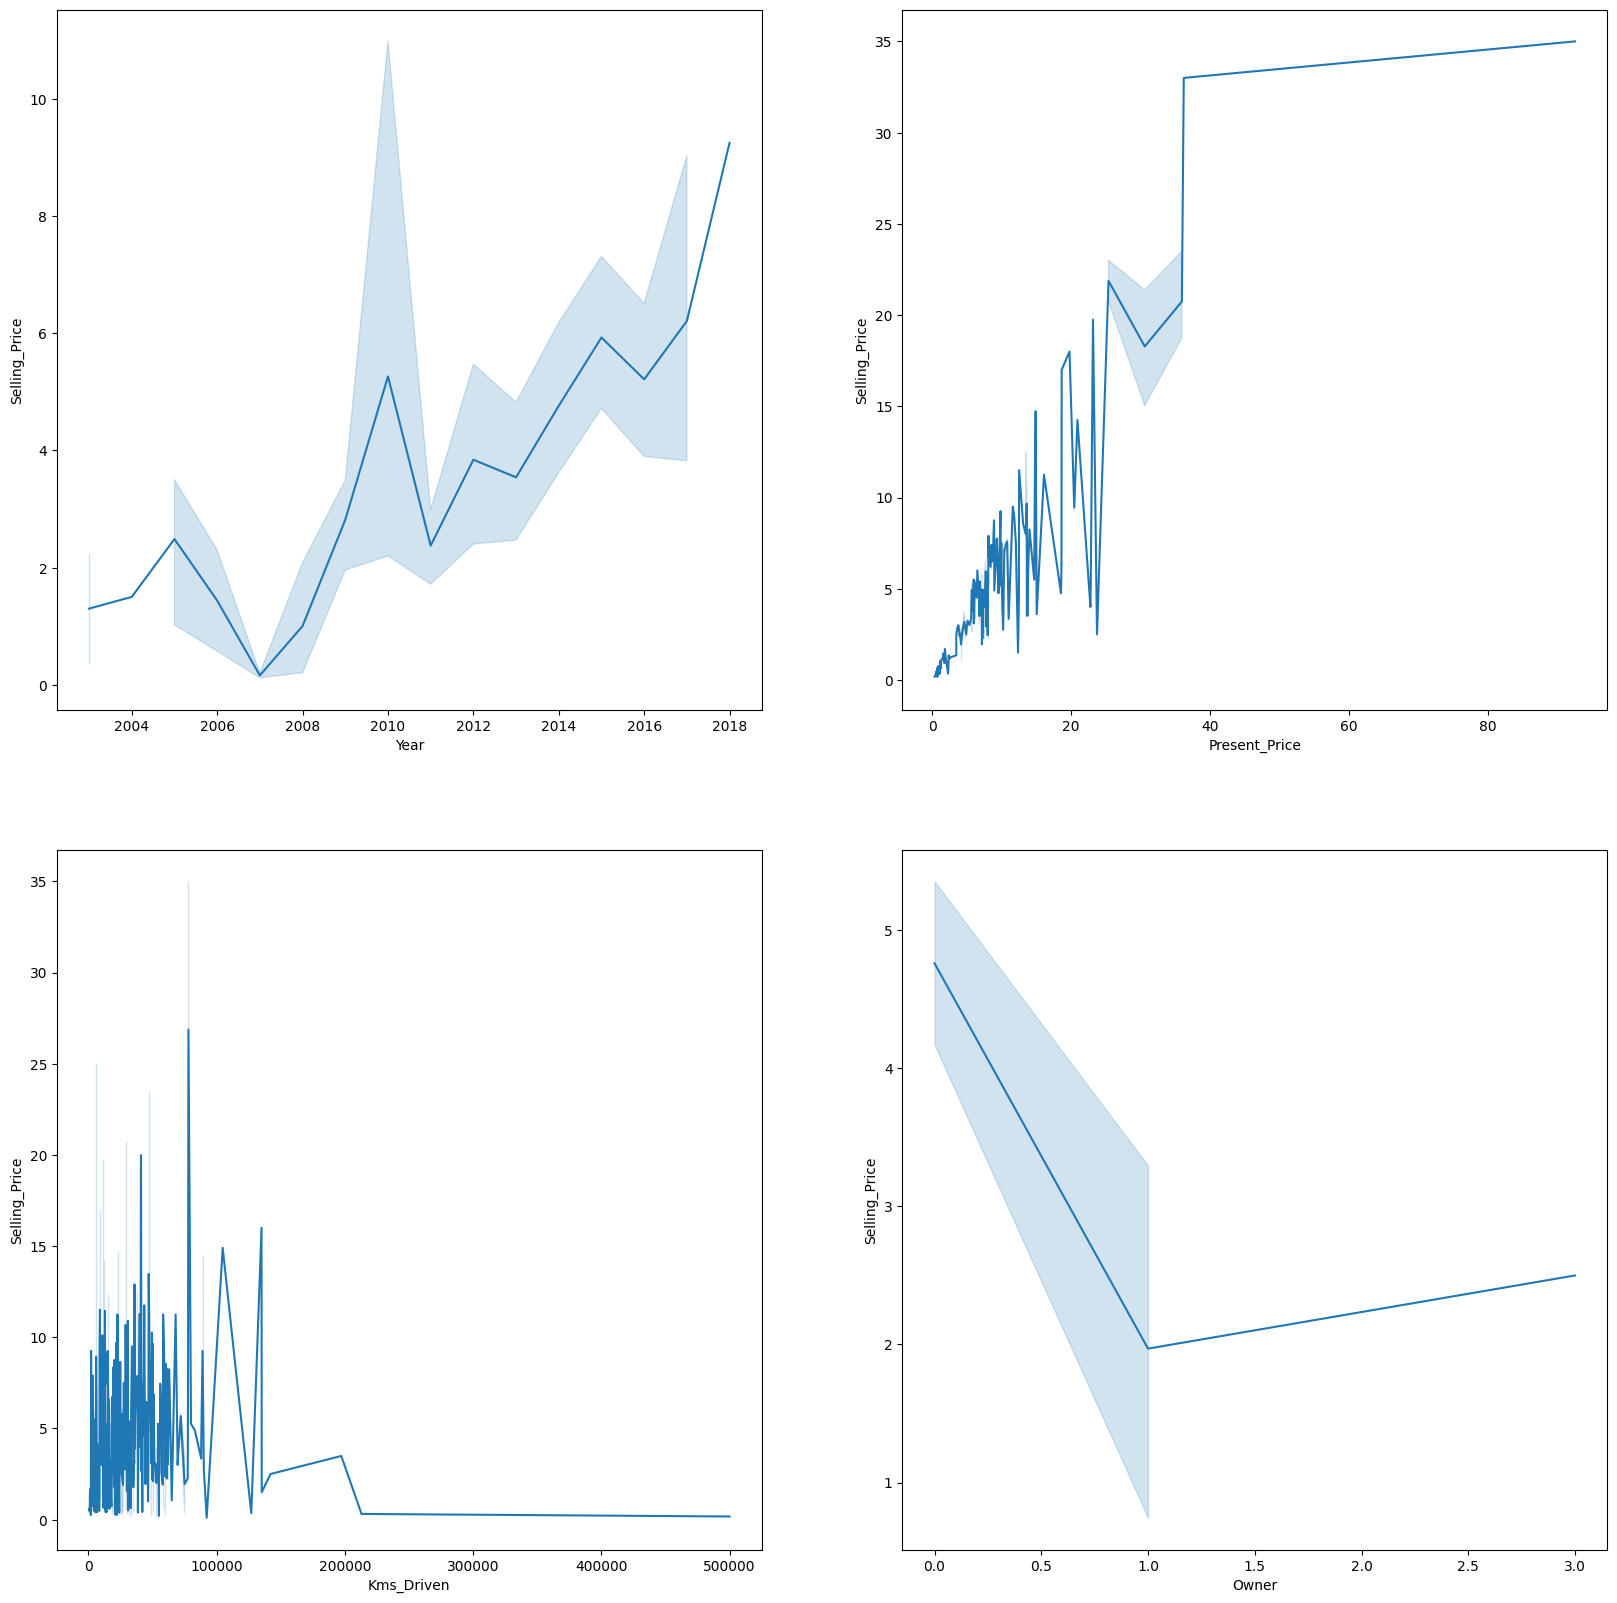

In [10]:
#Plotting Selling Price vs each feature individually to check if the high importance features suggested by correlation matrix are correct or not
f, axes = plt.subplots(2, 2, figsize=(20, 20))
cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols.pop(1)
j = 0
k = 0
for i, col in enumerate(cols):
    sns.lineplot(x=col, y="Selling_Price", data=df, ax=axes[j ,k])
    k = (k + 1) % 2
    if i%2 == 1:
        j += 1

In [11]:
#Calculating Mean, Median, Mode of all numerical columns
for col in number_cols:
  print(f"{col}:\nMean : {df[col].mean()}\nMedian : {df[col].median()}\nMode : {df[col].mode()[0]}\n\n")

Year:
Mean : 2013.6279069767443
Median : 2014.0
Mode : 2015


Selling_Price:
Mean : 4.661295681063123
Median : 3.6
Mode : 0.45


Present_Price:
Mean : 7.628471760797343
Median : 6.4
Mode : 9.4


Kms_Driven:
Mean : 36947.20598006644
Median : 32000.0
Mode : 15000


Owner:
Mean : 0.04318936877076412
Median : 0.0
Mode : 0




In [12]:
#Checking for NaN values:
na_counts = {col: 0 for col in df.columns}

for index, row in df.iterrows():
    for col in df.columns:
        if pd.isna(row[col]):
            na_counts[col] += 1

print("Columns with NA values:")
for column, count in na_counts.items():
    if count > 0:
        print(f"{column}: {count}")
    else:
        print(f"{column} : 0")

Columns with NA values:
Car_Name : 0
Year : 0
Selling_Price : 0
Present_Price : 0
Kms_Driven : 0
Fuel_Type : 0
Seller_Type : 0
Transmission : 0
Owner : 0


In [13]:
#Maximum and Minimum Values of all numerical features
min_values = {}
max_values = {}
for col in number_cols:
    min = float('inf')
    max = float('-inf')
    for val in df[col]:
        if val > max:
            max = val
        if val < min:
            min = val
    min_values[col] = min
    max_values[col] = max

for col in min_values.keys():
    print(f"{col} :\nMax : {max_values[col]}\nMin : {min_values[col]}\n\n")

Year :
Max : 2018
Min : 2003


Selling_Price :
Max : 35.0
Min : 0.1


Present_Price :
Max : 92.6
Min : 0.32


Kms_Driven :
Max : 500000
Min : 500


Owner :
Max : 3
Min : 0




Car_Name        98
Fuel_Type        3
Seller_Type      2
Transmission     2
dtype: int64


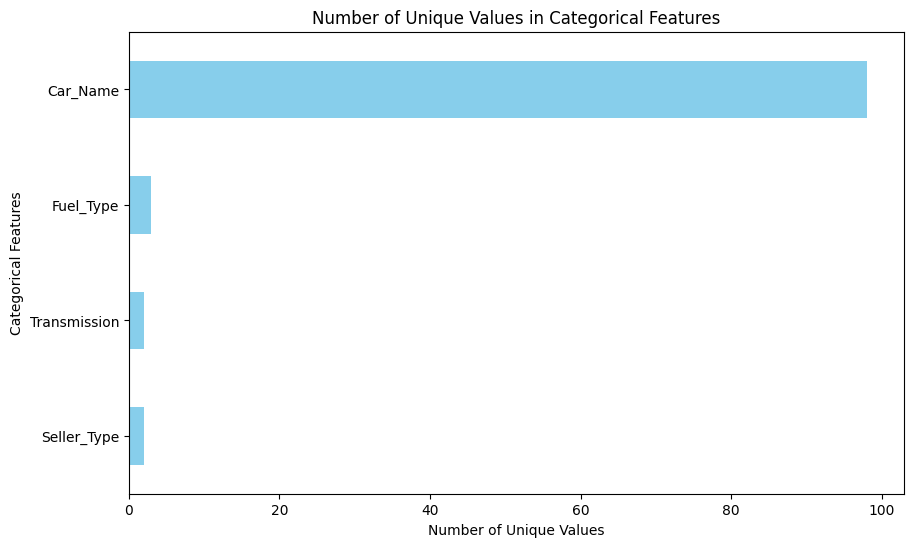

Car_Name : 

city : 26
corolla altis : 16
verna : 14
fortuner : 11
brio : 10
ciaz : 9
innova : 9
i20 : 9
grand i10 : 8
jazz : 7
amaze : 7
Royal Enfield Classic 350 : 7
ertiga : 6
eon : 6
sx4 : 6
alto k10 : 5
i10 : 5
swift : 5
Bajaj Pulsar 150 : 4
Royal Enfield Thunder 350 : 4
ritz : 4
wagon r : 4
etios liva : 4
dzire : 4
xcent : 3
etios cross : 3
Royal Enfield Thunder 500 : 3
TVS Apache RTR 160 : 3
Yamaha FZ S V 2.0 : 3
creta : 3
Honda CB Hornet 160R : 3
etios g : 3
Bajaj Avenger 220 : 3
Bajaj Pulsar NS 200 : 3
Bajaj Discover 125 : 2
Bajaj Pulsar 220 F : 2
TVS Apache RTR 180 : 2
Yamaha FZ  v 2.0 : 2
Honda Activa 4G : 2
Hero Extreme : 2
Honda CB twister : 2
Hero Splender iSmart : 2
Activa 3g : 2
Hero Passion Pro : 2
Honda CB Shine : 2
Bajaj Avenger 220 dtsi : 2
Honda CBR 150 : 2
elantra : 2
Royal Enfield Classic 500 : 2
KTM RC200 : 2
Honda Karizma : 2
Bajaj  ct 100 : 1
Hero  Ignitor Disc : 1
TVS Jupyter : 1
Hero Honda Passion Pro : 1
Hero Splender Plus : 1
vitara brezza : 1
Bajaj Discov

In [14]:
#Calculating number of unique values for categorical columns
unique_counts = df[categorical_cols].nunique()
print(unique_counts)
plt.figure(figsize=(10, 6))
unique_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Categorical Features')
plt.title('Number of Unique Values in Categorical Features')
plt.show()

#Counting frequency of each unique value for all categorical columns
for col in categorical_cols:
    y = df[col].value_counts()
    print(f"{col} : \n")
    for k,v in y.items():
        print(f"{k} : {v}")
    print("\n")

In [15]:
#Dropping Car_Name column as it has high cardinality
df.drop(['Car_Name'], axis = 1, inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
#One Hot Encoding the other 3 categorical columns
categorical_cols = df.select_dtypes(include = ['object', 'category']).columns
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(categorical_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
df_final.head()

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# The error is caused by the sparse=False argument passed to the OneHotEncoder constructor. This argument is not a valid parameter for the OneHotEncoder class. The correct way to create a OneHotEncoder without encoding sparse matrices is to simply omit the sparse parameter

In [23]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
OH_encoder = OneHotEncoder()
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[categorical_cols]))
OH_cols.index = df.index
df_final = df.drop(categorical_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,0
0,2014,3.35,5.59,27000,0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
1,2013,4.75,9.54,43000,0,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
2,2017,7.25,9.85,6900,0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
3,2011,2.85,4.15,5200,0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
4,2014,4.60,6.87,42450,0,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"


In [24]:
#Min-Max Scaling the features
X = df_final.drop(['Selling_Price'], axis=1)
y = df_final['Selling_Price']
X_scaled = X
for col in cols:
    X_scaled[col] = (X[col] - min_values[col]) / (max_values[col] - min_values[col])
X_scaled.head()

,Year,Present_Price,Kms_Driven,Owner,0
0,0.733333,0.057109,0.053053,0.0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
1,0.666667,0.099913,0.085085,0.0,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
2,0.933333,0.103273,0.012813,0.0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
3,0.533333,0.041504,0.009409,0.0,"(0, 2)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"
4,0.733333,0.070980,0.083984,0.0,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 6)\t1.0"


In [25]:
#Data Splitting
split_index = int(len(X_scaled) * 0.75)
X_train = X_scaled[:split_index]
X_test = X_scaled[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(225, 5) (76, 5) (225,) (76,)


In [ ]:
# Modelling

In [26]:
def initialize_weights(X):
    W = np.zeros(X.shape[1])
    b = 0
    return W, b

def compute(W, b, X):
    return np.dot(X, W)+b

def loss(y_true, y_pred):
    #Mean Squared Error
    return np.mean((y_true - y_pred) ** 2)

def update_params(W, b, learning_rate, dw, db):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return W, b

def train(X, y, learning_rate, epochs):
    W, b = initialize_weights(X)
    losses = []
    for i in range(epochs):
        y_pred = compute(W, b, X)
        loss_value = loss(y, y_pred)
        losses.append(loss_value)

        val=np.dot(X.T, (y_pred - y))
        dw = 2 * (val) / X.shape[0]
        db = 2 * np.sum(y_pred - y) / X.shape[0]
        W, b = update_params(W, b, learning_rate, dw, db)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss_value}")
    return W, b

W_final, b_final = train(X_train, y_train, 0.01, 40000)

NotImplementedError: subtracting a sparse array from a nonzero scalar is not supported

In [27]:
# The issue appears to be related to the np.dot() function not supporting subtraction between a scalar and a sparse matrix.

In [39]:
def initialize_weights(X):
    W = np.zeros(X.shape[1])
    b = 0
    return W, b

def compute(W, b, X):
    return np.dot(X, W)+b

def loss(y_true, y_pred):
    #Mean Squared Error
    return np.mean((y_true - y_pred) ** 2)

def update_params(W, b, learning_rate, dw, db):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return W, b

def train(X, y, learning_rate, epochs):
    W, b = initialize_weights(X)
    losses = []
    for i in range(epochs):
        y_pred = compute(W, b, X)
        loss_value = loss(y, y_pred)
        losses.append(loss_value)

        val=np.dot(X.T, (y_pred - y))
        dw = 2 * (val) / X.shape[0]
        db = 2 * np.sum(y_pred - y) / X.shape[0]
        W, b = update_params(W, b, learning_rate, dw, db)

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss_value}")
    return W, b

W_final, b_final = train(X_train, y_train, 0.01, 40000)

NotImplementedError: subtracting a sparse array from a nonzero scalar is not supported

In [40]:
#MSE on predicted values
y_pred_vals = np.dot(X_test, W_final)+b_final
loss_value = loss(y_test, y_pred_vals)
loss_value

NameError: name 'W_final' is not defined